In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("shopping.csv")

In [20]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [21]:
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [22]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [23]:
df["Review Rating"] = df.groupby("Category")["Review Rating"].transform(lambda x : x.fillna(x.median()))

In [24]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [25]:
df = df.rename(columns={
    "customerid": "customer_id",
    "itempurchased": "item_purchased",
    "purchaseamountusd": "purchase_amount",
    "reviewrating": "review_rating",
    "subscriptionstatus": "subscription_status",
    "shippingtype": "shipping_type",
    "discountapplied": "discount_applied",
    "promocodeused": "promo_code_used",
    "previouspurchases": "previous_purchases",
    "paymentmethod": "payment_method",
    "frequencyofpurchases": "frequency_of_purchases"
})


In [26]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [27]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [28]:
labels = ["Young Adult" , "Adult" , "Middle-aged" , "Senior"]
df["age_group"] = pd.qcut(df["Age"] , q=4 ,labels = labels)

In [29]:
df["age_group"]

0       Middle-aged
1       Young Adult
2       Middle-aged
3       Young Adult
4       Middle-aged
           ...     
3895          Adult
3896    Middle-aged
3897    Middle-aged
3898          Adult
3899    Middle-aged
Name: age_group, Length: 3900, dtype: category
Categories (4, object): ['Young Adult' < 'Adult' < 'Middle-aged' < 'Senior']

In [30]:
frequency_mapping = {
    "Fortnightly": 14,
    "Weekly": 7,
    "Monthly": 30,
    "Quarterly": 90,
    "Bi-Weekly": 14,
    "Annually": 365,
    "Every 3 Months": 90
}

df["purchase_frequency_days"] = (
    df["Frequency of Purchases"]
    .str.strip()
    .str.title()
    .map(frequency_mapping)
)


In [31]:
df["purchase_frequency_days"]

0        14
1        14
2         7
3         7
4       365
       ... 
3895      7
3896     14
3897     90
3898      7
3899     90
Name: purchase_frequency_days, Length: 3900, dtype: int64

In [32]:
df[['Discount Applied', 'Promo Code Used']].head(15)

,Discount Applied,Promo Code Used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [33]:
(df["Discount Applied"] == df["Promo Code Used"]).all()

True

In [34]:
df = df.drop("Promo Code Used" , axis = 1)

In [35]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,Middle-aged,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,Young Adult,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,Middle-aged,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,Young Adult,7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,Middle-aged,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,32,Venmo,Weekly,Adult,7
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,41,Bank Transfer,Bi-Weekly,Middle-aged,14
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,24,Venmo,Quarterly,Middle-aged,90
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,24,Venmo,Weekly,Adult,7


In [36]:
pip install sqlalchemy pymysql


In [37]:
from sqlalchemy import create_engine

DB_USER = "root"
DB_PASSWORD = "Ajay1234"
DB_HOST = "localhost"
DB_PORT = 3306
DB_NAME = "customer_behaviour"


In [38]:
engine = create_engine(
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)


In [39]:
with engine.connect() as conn:
    print("Connected to MySQL successfully!")


Connected to MySQL successfully!


In [40]:
df.to_sql(
    name="customer_purchases",
    con=engine,
    if_exists="replace",
    index=False
)


3900

#Q1) what is total revenue generated by male vs female customers in diffrent category

In [41]:
query = """
SELECT Gender, Category,
       SUM(purchase_amount_usd) AS revenue
FROM customer_purchases
GROUP BY Gender, Category
"""


In [42]:
df = pd.read_sql(query, engine)
df.head()


,Gender,Category,revenue
0,Male,Clothing,70628.0
1,Male,Footwear,24258.0
2,Male,Outerwear,12623.0
3,Male,Accessories,50381.0
4,Female,Clothing,33636.0


In [43]:
print(type(df))
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
Index(['Gender', 'Category', 'revenue'], dtype='object')


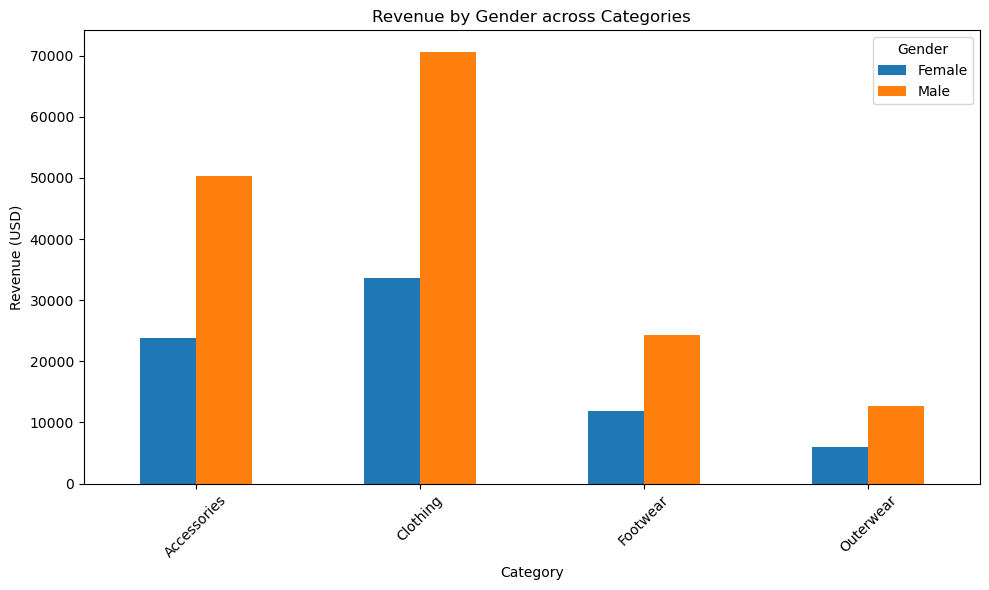

In [44]:
pivot_df = df.pivot(index="Category", columns="Gender", values="revenue")

pivot_df.plot(kind="bar", figsize=(10,6))
plt.title("Revenue by Gender across Categories")
plt.xlabel("Category")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


#Q2) which customer used a discount but still spend than averge purchase amount 

In [45]:
query = """
SELECT `Customer ID`, purchase_amount_usd
FROM customer_purchases
WHERE discount_applied = 'Yes'
  AND purchase_amount_usd >= (
      SELECT AVG(purchase_amount_usd)
      FROM customer_purchases
  )
"""

df_discount = pd.read_sql(query, engine)
df_discount.head()


,Customer ID,purchase_amount_usd
0,2,64
1,3,73
2,4,90
3,7,85
4,9,97


In [46]:
n = len(df_discount)
bins = int(np.sqrt(n))
bins

28

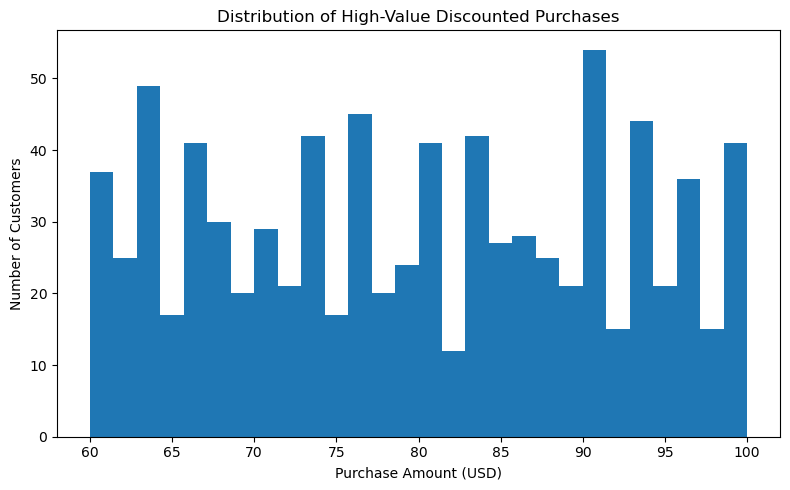

In [47]:
plt.figure(figsize=(8,5))
plt.hist(df_discount["purchase_amount_usd"], bins=bins)

plt.title("Distribution of High-Value Discounted Purchases")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()


#Q3) which are top 5 products with the highest product review rating

In [48]:
query = """
SELECT 
    `Item Purchased`,
    ROUND(AVG(`Review Rating`), 2) AS average_review_rating
FROM customer_purchases
GROUP BY `Item Purchased`
ORDER BY average_review_rating DESC
LIMIT 5
"""

df_top_items = pd.read_sql(query, engine)
df_top_items


,Item Purchased,average_review_rating
0,Gloves,3.86
1,Sandals,3.84
2,Boots,3.82
3,Hat,3.80
4,Handbag,3.78


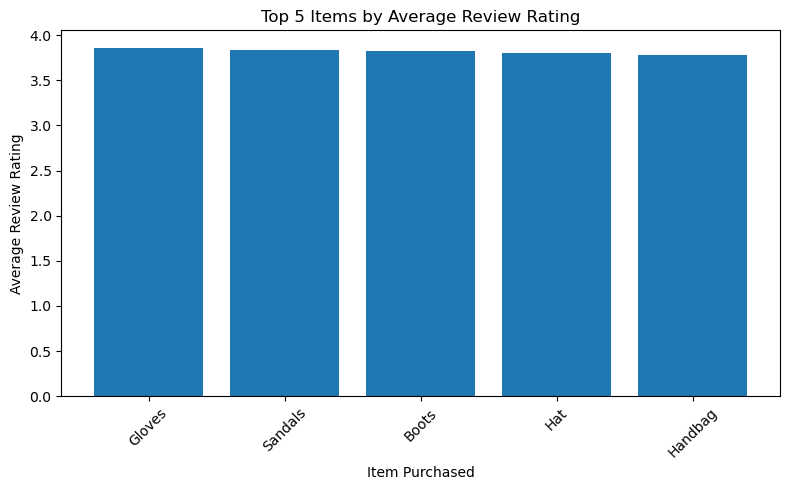

In [49]:
plt.figure(figsize=(8,5))

plt.bar(
    df_top_items["Item Purchased"],
    df_top_items["average_review_rating"]
)

plt.title("Top 5 Items by Average Review Rating")
plt.xlabel("Item Purchased")
plt.ylabel("Average Review Rating")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Q4) Comapre the Averge purchase amount between Express and Standard Shipping

In [50]:
query = """
SELECT 
    `Shipping Type`,
    ROUND(AVG(`purchase_amount_usd`), 2) AS average_purchase_amount
FROM customer_purchases
WHERE `Shipping Type` IN ('Standard', 'Express')
GROUP BY `Shipping Type`
"""

df_shipping = pd.read_sql(query, engine)
df_shipping


,Shipping Type,average_purchase_amount
0,Express,60.48
1,Standard,58.46


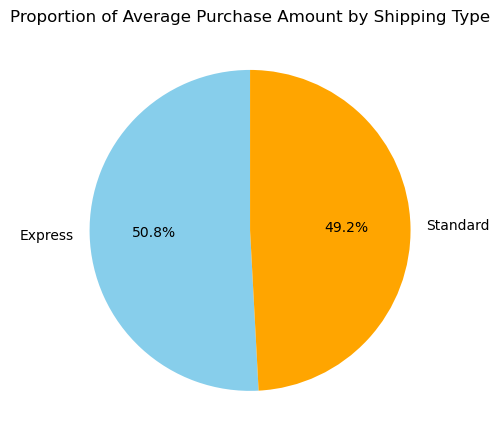

In [51]:
plt.figure(figsize=(5,5))
plt.pie(
    df_shipping["average_purchase_amount"],
    labels=df_shipping["Shipping Type"],
    autopct='%1.1f%%',
    colors=['skyblue', 'orange'],
    startangle=90
)
plt.title("Proportion of Average Purchase Amount by Shipping Type")
plt.tight_layout()
plt.show()


#Q5) Which 5 products have highest percent of percenatge when discount applied

In [52]:
query = """
SELECT 
    `Item Purchased`,
    ROUND(100 * SUM(CASE WHEN discount_applied = "Yes" THEN 1 ELSE 0 END)/COUNT(*), 2) AS discount_rate
FROM customer_purchases
GROUP BY `Item Purchased`
ORDER BY discount_rate DESC
LIMIT 5;
"""

df_discount = pd.read_sql(query, engine)
df_discount

,Item Purchased,discount_rate
0,Hat,50.00
1,Sneakers,49.66
2,Coat,49.07
3,Sweater,48.17
4,Pants,47.37


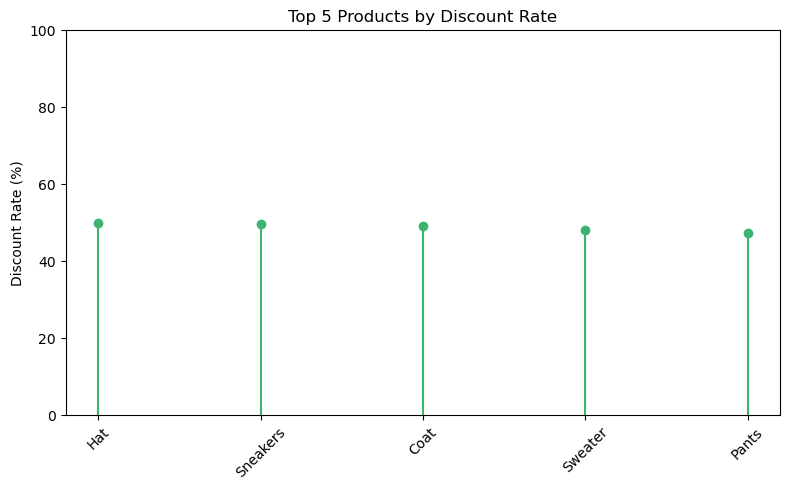

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Map item names to numeric positions
x = np.arange(len(df_discount))
y = df_discount["discount_rate"]

plt.figure(figsize=(8,5))

# Draw stems and markers (without use_line_collection)
plt.stem(x, y, basefmt=" ", linefmt='mediumseagreen', markerfmt='o')

# Set x-axis labels
plt.xticks(x, df_discount["Item Purchased"], rotation=45)

plt.title("Top 5 Products by Discount Rate")
plt.ylabel("Discount Rate (%)")
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


#Q6) Segement Customers into new , Returning , and loyal based on therir total number
#number of previous purchases and show count of each segment

In [54]:
query = """
WITH customer_type AS (
    SELECT `Customer ID`, `Previous Purchases`,
    CASE
        WHEN `Previous Purchases` = 1 THEN 'New'
        WHEN `Previous Purchases` BETWEEN 2 AND 10 THEN 'Returning'
        ELSE 'Loyal'
    END AS customer_segment
    FROM customer_purchases
)
SELECT customer_segment, COUNT(*) AS number_of_customers
FROM customer_type
GROUP BY customer_segment;
"""

df_customers = pd.read_sql(query, engine)

In [55]:
df_customers

,customer_segment,number_of_customers
0,Loyal,3116
1,Returning,701
2,New,83


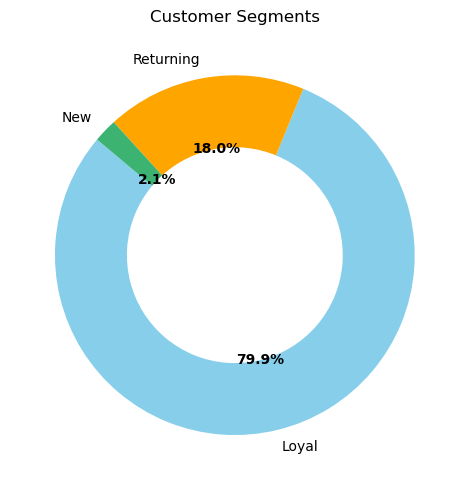

In [56]:
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    df_customers["number_of_customers"],
    labels=df_customers["customer_segment"],
    autopct='%1.1f%%',
    colors=['skyblue','orange','mediumseagreen'],
    startangle=140,
    wedgeprops={'width':0.4}  # creates donut effect
)
plt.setp(autotexts, size=10, weight="bold")
plt.title("Customer Segments")
plt.tight_layout()
plt.show()


#Q7) what are top 3 products purchased within each category

In [57]:
query = """
WITH item_counts AS (
    SELECT Category, `Item Purchased`,
           COUNT(`Customer ID`) AS total_orders,
           ROW_NUMBER() OVER (PARTITION BY Category ORDER BY COUNT(`Customer ID`) DESC) AS Item_rank
    FROM customer_purchases
    GROUP BY Category, `Item Purchased`
)
SELECT Item_rank, Category, `Item Purchased`, total_orders
FROM item_counts
WHERE Item_rank <= 3;
"""

df_top3 = pd.read_sql(query, engine)
df_top3

,Item_rank,Category,Item Purchased,total_orders
0,1,Accessories,Jewelry,171
1,2,Accessories,Sunglasses,161
2,3,Accessories,Belt,161
3,1,Clothing,Blouse,171
4,2,Clothing,Pants,171
5,3,Clothing,Shirt,169
6,1,Footwear,Sandals,160
7,2,Footwear,Shoes,150
8,3,Footwear,Sneakers,145
9,1,Outerwear,Jacket,163


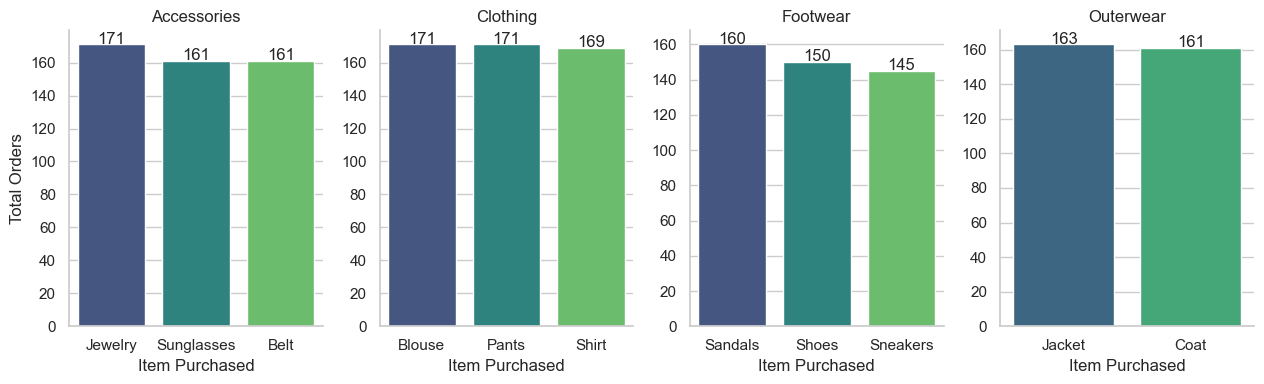

In [58]:
sns.set(style="whitegrid")

# Create FacetGrid: one plot per Category
g = sns.FacetGrid(df_top3, col="Category", sharey=False, sharex=False, height=4, aspect=0.8)

# Map vertical barplot to each facet
g.map_dataframe(sns.barplot, x="Item Purchased", y="total_orders", palette="viridis")

# Set titles and labels
g.set_axis_labels("Item Purchased", "Total Orders")
g.set_titles(col_template="{col_name}")

# Add values on top of bars
for ax, (_, subdata) in zip(g.axes.flat, df_top3.groupby("Category")):
    for i, (index, row) in enumerate(subdata.iterrows()):
        ax.text(i, row["total_orders"] + 0.5, int(row["total_orders"]), ha='center')

plt.tight_layout()
plt.show()

Q8) Are Customers who are repeat buyers ( more than 5 previous purchases) alsol like to subscribe

In [59]:
query = """
SELECT `Subscription Status`, COUNT(`Customer ID`) AS repeat_buyers
FROM customer_purchases
WHERE `Previous Purchases` > 5
GROUP BY `Subscription Status`;
"""

df_repeat_sub = pd.read_sql(query, engine)
df_repeat_sub 


,Subscription Status,repeat_buyers
0,Yes,958
1,No,2518


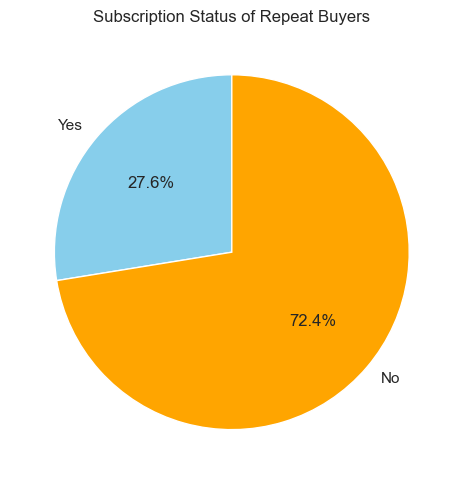

In [60]:
plt.figure(figsize=(5,5))
plt.pie(
    df_repeat_sub["repeat_buyers"],
    labels=df_repeat_sub["Subscription Status"],
    autopct='%1.1f%%',
    colors=['skyblue','orange'],
    startangle=90
)
plt.title("Subscription Status of Repeat Buyers")
plt.tight_layout()
plt.show()


#Q9) what is the revenue contribution of each age group 

In [61]:
query = """
SELECT age_group, SUM(purchase_amount_usd) AS revenue
FROM customer_purchases
GROUP BY age_group
ORDER BY revenue DESC;
"""

df_age_revenue = pd.read_sql(query, engine)

In [62]:
df_age_revenue


,age_group,revenue
0,Young Adult,62143.0
1,Middle-aged,59197.0
2,Adult,55978.0
3,Senior,55763.0


In [63]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


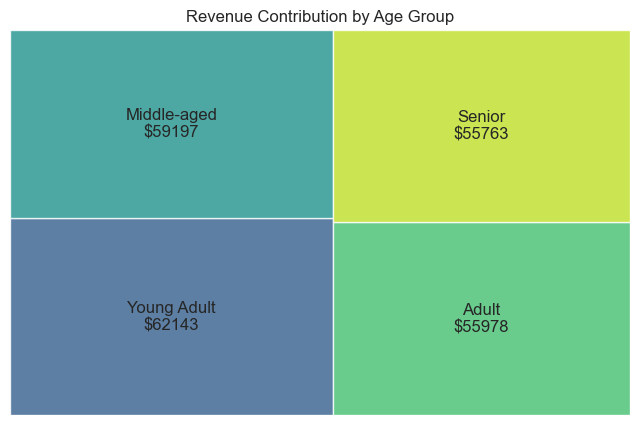

In [64]:
import squarify  # pip install squarify

plt.figure(figsize=(8,5))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(df_age_revenue)))
squarify.plot(
    sizes=df_age_revenue["revenue"],
    label=df_age_revenue["age_group"] + "\n$" + df_age_revenue["revenue"].astype(int).astype(str),
    color=colors,
    alpha=0.8
)
plt.axis('off')
plt.title("Revenue Contribution by Age Group")
plt.show()

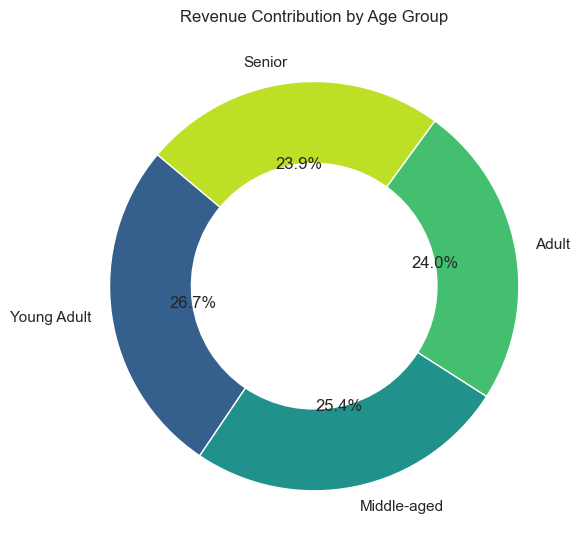

In [65]:
df_age_revenue = pd.read_sql(query, engine)

plt.figure(figsize=(6,6))
plt.pie(
    df_age_revenue["revenue"],
    labels=df_age_revenue["age_group"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.viridis(np.linspace(0.3, 0.9, len(df_age_revenue))),
    wedgeprops={'width':0.4}  # donut effect
)
plt.title("Revenue Contribution by Age Group")
plt.tight_layout()
plt.show()

In [ ]:
#Q5) Do Susbscribed customers spend more ? comapre Averge spend and total revenue between susbscribers and non-subscribers

In [66]:
query = """
SELECT 
    `Subscription Status`,
    COUNT(`Customer ID`) AS total_customers,
    ROUND(AVG(purchase_amount_usd), 2) AS average_spend,
    ROUND(SUM(purchase_amount_usd), 2) AS revenue
FROM customer_purchases
GROUP BY `Subscription Status`
ORDER BY average_spend, revenue DESC;
"""

df_subs = pd.read_sql(query, engine)
df_subs


,Subscription Status,total_customers,average_spend,revenue
0,Yes,1053,59.49,62645.0
1,No,2847,59.87,170436.0


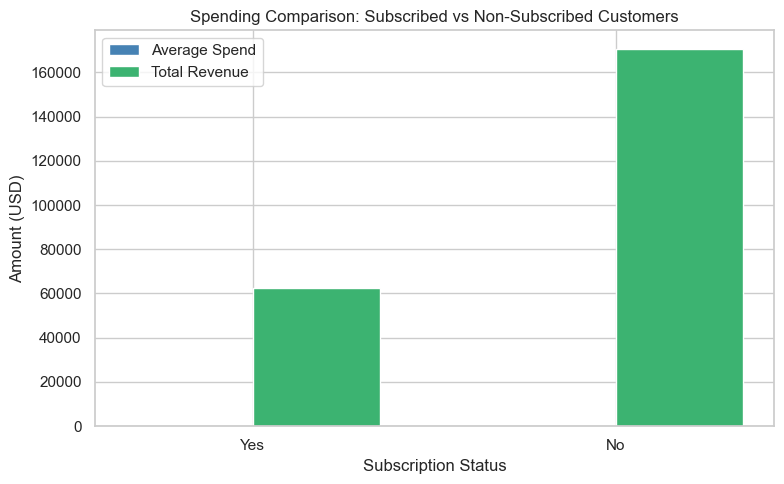

In [68]:


x = np.arange(len(df_subs))
width = 0.35

plt.figure(figsize=(8,5))

# Bars
plt.bar(x - width/2, df_subs["average_spend"], width, label="Average Spend", color="steelblue")
plt.bar(x + width/2, df_subs["revenue"], width, label="Total Revenue", color="mediumseagreen")

# Labels & title
plt.xticks(x, df_subs["Subscription Status"])
plt.xlabel("Subscription Status")
plt.ylabel("Amount (USD)")
plt.title("Spending Comparison: Subscribed vs Non-Subscribed Customers")
plt.legend()

plt.tight_layout()

